# **1️⃣ Import dataset IoT (CSV)**

In [1]:
# import gdown

# url = 'https://drive.google.com/file/d/1kZ42n69ZuNsyU4Hj3UmRWjc7WFunc08F/view'
# output = 'dataset.csv'

# gdown.download(url, output, quiet=False, fuzzy=True)

In [ ]:
import pandas as pd

df = pd.read_csv("dataset_finpro.csv", sep=',')
df

,timestamp,temperature,humidity,label
0,2025-12-10 15:17:53,23.9,60.5,dingin
1,2025-12-10 15:17:55,23.9,60.4,dingin
2,2025-12-10 15:17:57,23.9,60.2,dingin
3,2025-12-10 15:17:59,23.9,60.1,dingin
4,2025-12-10 15:18:01,23.9,60.0,dingin
...,...,...,...,...
444,2025-12-10 20:48:03,32.7,75.3,panas
445,2025-12-10 20:48:06,32.7,74.1,panas
446,2025-12-10 20:48:08,32.7,73.1,panas
447,2025-12-10 20:48:09,32.7,71.1,panas


# **2️⃣ Train-Test Split**


In [7]:
from sklearn.model_selection import train_test_split

X = df[['temperature', 'humidity']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


# **3️⃣ Pilih 2 Model untuk Dibandingkan**
*   Decision Tree 🌳
*   KNN 🔍




In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

models = {
    "dt": {
        "name": "Decision Tree",
        "model": DecisionTreeClassifier(max_depth=5),
    },
    "knn": {
        "name": "KNN",
        "model": KNeighborsClassifier(n_neighbors=5),    
    },
    "svm": {
        "name": "SVM",
        "model": SVC(kernel='linear', gamma=0.001)
    }
}


# **4️⃣ Training + Evaluasi Akurasi & Confusion Matrix**


Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        20

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



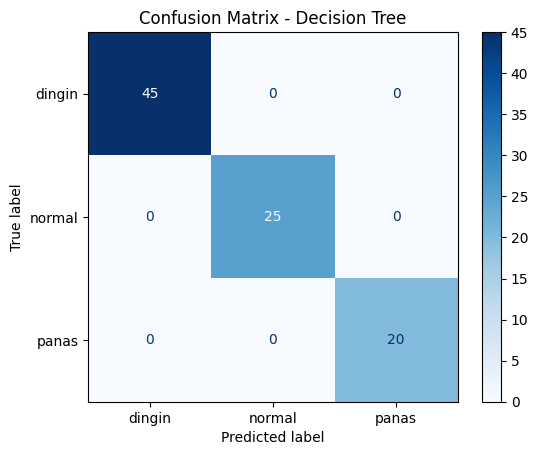


KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        20

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



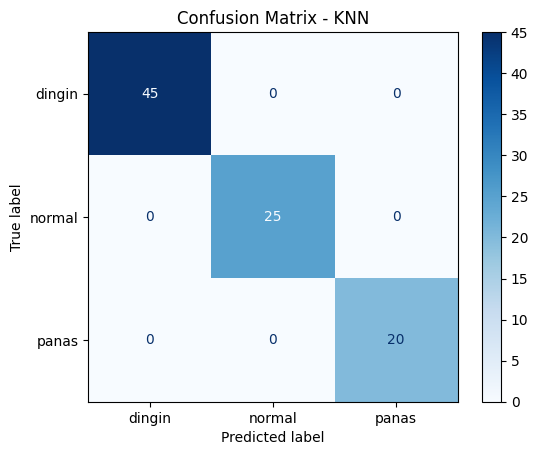


SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        20

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



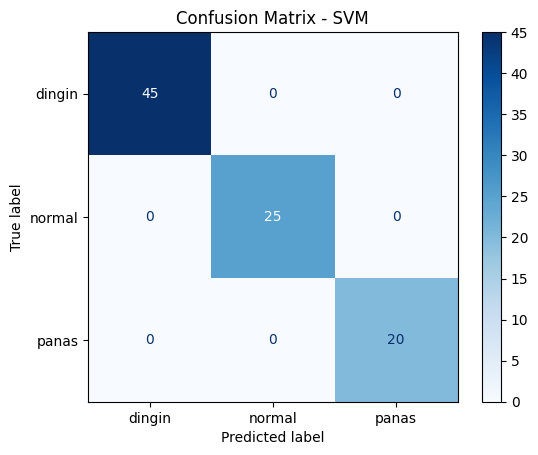

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    model['model'].fit(X_train, y_train_enc)
    y_pred = model['model'].predict(X_test)

    print(f"\n{model["name"]}")
    print(classification_report(y_test_enc, y_pred))

    cm = confusion_matrix(y_test_enc, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model["name"]}")
    plt.show()


Decision Tree memiliki performa sempurna dengan semua metrik bernilai 1.0. KNN memiliki performa yang sedikit lebih buruk yakni f1-macro 0.92. Pembentukan cabang-cabang pada Decision Tree dapat menentukan batas-batas yang lebih jelas untuk menentukan suhu yang tepat berdasarkan suhu dan kelembaban yang diberikan. KNN memiliki kelemahan yakni sistem voting pemilihan kelas di antara K tetangga dapat memberikan bias ke arah vote kelas terbanyak. Dengan demikian, model Decision Tree lebih cocok untuk early warning system IoT suhu ruang server

In [11]:
# export the best model to pickle
import joblib
# best_model = models["dt"]
# best_model = models["knn"]
best_model = models["svm"]

y_enc = le.fit_transform(y)

best_model['model'].fit(X, y_enc)


filename = 'iot_temp_model_' + best_model['name'].lower()
joblib.dump(best_model, filename + '.pkl')

['iot_temp_model_svm.pkl']

In [13]:
from micromlgen import port

c_code = port(best_model['model'], class_name="IotTempModel")

with open(filename + ".h", "w") as f:
    f.write(c_code)

In [12]:
print(le.classes_)
print('label mapping:', dict(zip(le.classes_, le.transform(le.classes_))))

['dingin' 'normal' 'panas']
label mapping: {'dingin': np.int64(0), 'normal': np.int64(1), 'panas': np.int64(2)}
